In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import rc
from matplotlib.pyplot import cycler
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.cm

# Setup Environment

In [10]:
def get_cycle(cmap, N=None, use_index="auto"):
    if isinstance(cmap, str):
        if use_index == "auto":
            if cmap in ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']:
                use_index=True
            else:
                use_index=False
        cmap = matplotlib.cm.get_cmap(cmap)
    if not N:
        N = cmap.N
    if use_index=="auto":
        if cmap.N > 100:
            use_index=False
        elif isinstance(cmap, LinearSegmentedColormap):
            use_index=False
        elif isinstance(cmap, ListedColormap):
            use_index=True
    if use_index:
        ind = np.arange(int(N)) % cmap.N
        return cycler("color",cmap(ind))
    else:
        colors = cmap(np.linspace(0,1,N))
        return cycler("color",colors)

rc('text',usetex=True)
plt.rcParams["axes.prop_cycle"] = get_cycle("tab20", 8)
print(plt.rcParams['axes.prop_cycle'])
plt.style.use('ggplot')
ggcol = []
for i,c in enumerate(plt.rcParams['axes.prop_cycle']):
    ggcol.append(c['color'])
get_colour = lambda x: ggcol[x % len(ggcol)]
ggmarkers = ['o','x','s','v','^','<','>','8','p','h','d']
get_marker = lambda x: ggmarkers[x % len(ggmarkers)]
line_styles = ['-','--',':','-.']
get_ls = lambda x: line_styles[x // len(ggcol)]

cycler('color', [array([0.12156863, 0.46666667, 0.70588235, 1.        ]), array([0.68235294, 0.78039216, 0.90980392, 1.        ]), array([1.        , 0.49803922, 0.05490196, 1.        ]), array([1.        , 0.73333333, 0.47058824, 1.        ]), array([0.17254902, 0.62745098, 0.17254902, 1.        ]), array([0.59607843, 0.8745098 , 0.54117647, 1.        ]), array([0.83921569, 0.15294118, 0.15686275, 1.        ]), array([1.        , 0.59607843, 0.58823529, 1.        ])])


# plot specific properties

In [306]:
# Figure Size
# Bar Charts
fw = 12
fh = 6

# Line Charts
fw1 = 12
fh1 = 4

# Axis Labels
ticksize = 12
ticklabelsize = 12
axislabelsize= 16
titlesize = 20
rot_angle= 75

# Line Properties
lw = 3
ls = '--'

In [206]:
input_file = '../data/SYNIMG/synimg_rank2_strongscaling.dat'
num_iters=100

# rank 2 strong scaling

In [207]:
df1=pd.read_csv(input_file, delimiter=" ", comment='#')
df2 =df1[['level','p','gram-max','nnls-max','mm-max','reducescatter-max','allgather-max','allreduce-max','comm-max','comp-max']]

df2["total_time"] = df2[['gram-max','nnls-max','mm-max','reducescatter-max','allgather-max','allreduce-max']].sum(axis=1)

for col in ['gram-max','nnls-max','mm-max','reducescatter-max','allgather-max','allreduce-max','comm-max','comp-max']:
    df2[col] = df2[col] / df2["total_time"];

In [118]:
df2

,level,p,gram-max,nnls-max,mm-max,reducescatter-max,allgather-max,allreduce-max,comm-max,comp-max,total_time
0,0,420.0,0.000120,0.005603,0.988385,0.004426,0.001271,0.000195,0.005875,0.994083,197.958372
1,0,840.0,0.000259,0.011903,0.972748,0.008037,0.005836,0.001217,0.014897,0.984872,115.561263
2,0,1260.0,0.000444,0.017473,0.955813,0.016091,0.009292,0.000887,0.026142,0.973655,76.220000
3,0,1680.0,0.000947,0.019859,0.937468,0.025483,0.013043,0.003201,0.041386,0.958117,55.023017
4,0,2100.0,0.001264,0.019749,0.895103,0.043348,0.038124,0.002412,0.083565,0.915925,43.267290
5,0,2520.0,0.001681,0.021378,0.860966,0.060687,0.052241,0.003047,0.115655,0.883631,36.064956
6,0,2940.0,0.001877,0.023467,0.851042,0.088007,0.031056,0.004551,0.123198,0.876237,30.406259
7,0,3360.0,0.002364,0.024416,0.815438,0.117414,0.033469,0.006898,0.157371,0.841680,27.311810


In [208]:
df2['Comp-Sigma']=0
df2['Comm-Sigma']=0
df3 = df2[['mm-max','nnls-max','gram-max','Comp-Sigma','allgather-max','reducescatter-max','allreduce-max','Comm-Sigma']]
df3 = df3.rename(columns={
        'gram-max':'Gram',
        'nnls-max':'NNLS',
    'mm-max':'MatMul',
    'reducescatter-max':'ReduceScatter',
    'allgather-max':'AllGather',
    'allreduce-max':'AllReduce'
    }, errors="raise")

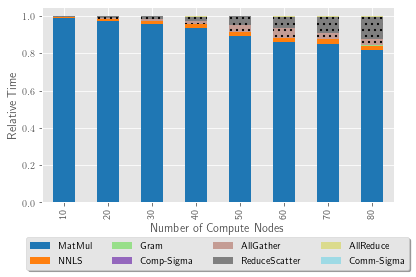

In [121]:
#title = 'Real World Rank-2 Strong Scaling Breakdown'
f = plt.figure()
#plt.title(title, color='black')
df3.plot(kind='bar', stacked=True, ax = f.gca(), colormap = plt.cm.tab20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4)
ind = np.arange(8) 
plt.xticks(ind, ['10', '20', '30', '40','50','60','70','80'])
plt.xlabel('Number of Compute Nodes')
plt.ylabel('Relative Time')
bars = f.gca().patches
hatches = ''.join(h*len(df3) for h in '    ....')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(2*hatch)
plt.tight_layout()
plt.savefig('realworld_rank2_strongscaling.pdf')

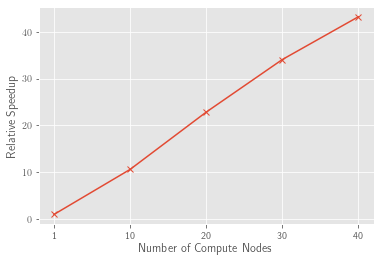

In [211]:
#title = 'Realworld Rank-2 Strong Scaling Speedup'
f = plt.figure()
#plt.title(title, color='black')
speedup = (df2['total_time'].max())/df2['total_time']
speedup.plot(kind='line', ax = f.gca(), marker='x')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=6)
ind = np.arange(5) 
plt.xticks(ind, ['1','10', '20', '30', '40'])
plt.xlabel('Number of Compute Nodes')
plt.ylabel('Relative Speedup')
plt.savefig('synthetic_rank2_speedup.pdf')

# hierarchical strong scaling

In [195]:
input_file_2 = '../data/SYNIMG/synimg_hierarchical_strongscaling.dat'
df1=pd.read_csv(input_file_2, delimiter=" ", comment='#')
df2 =df1[['level','p','gram-max','nnls-max','mm-max','reducescatter-max','allgather-max','allreduce-max','comm-max','comp-max', 'MATVEC(SIGMA)', 'VECMAT(SIGMA)', 'NORM(SIGMA)', 'COMM(SIGMA)']]

In [196]:
df2

,level,p,gram-max,nnls-max,mm-max,reducescatter-max,allgather-max,allreduce-max,comm-max,comp-max,MATVEC(SIGMA),VECMAT(SIGMA),NORM(SIGMA),COMM(SIGMA)
0,0,42.0,0.036386,1.384860,271.252000,0.090287,0.042657,0.012724,0.145459,272.671000,0.000000,0.000000,0.000000,0.000000
1,1,84.0,0.055930,2.492170,250.005000,0.132844,0.061925,0.024450,0.218821,252.549000,1.382445,1.453262,0.007732,0.001290
2,2,168.0,0.093580,5.162990,233.954300,0.212395,0.112586,0.071349,0.393930,239.205800,1.339304,1.442065,0.009873,0.002669
3,3,336.0,0.164461,9.932660,199.403900,0.360347,0.205359,0.142600,0.700928,209.489500,1.069428,1.201062,0.007818,0.002002
4,4,672.0,0.304295,19.344910,177.875860,0.668895,0.400992,0.404715,1.463188,197.498880,0.931390,1.095762,0.007530,0.004160
5,5,1344.0,0.534187,39.210596,166.336080,1.414051,0.795424,0.701234,2.887524,206.048920,0.962890,1.089107,0.008593,0.012736
6,6,2688.0,1.036242,75.860142,161.031760,2.778771,1.492313,1.089985,5.328865,237.867840,1.012813,1.109255,0.010164,0.024292
7,0,420.0,0.016703,0.983623,24.060300,0.117051,0.250201,0.279559,0.646324,25.057700,0.000000,0.000000,0.000000,0.000000
8,1,840.0,0.031141,1.973826,24.090300,0.285922,0.371674,0.498170,1.151484,26.090000,0.144880,0.174290,0.010399,0.006225
9,2,1680.0,0.049644,3.863721,23.130720,0.633267,0.509544,0.532710,1.670583,27.037910,0.152875,0.180667,0.010978,0.009063


In [197]:
df2 = df2[df2['level']<6]
df2['p']=df2['p']/((2**df2['level'])*42)

/Users/rnu/Documents/virtualenv3/nlum3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [198]:
df2['Comp-Sigma']=df2['MATVEC(SIGMA)']+df2['VECMAT(SIGMA)'] +df2['NORM(SIGMA)']
df2 = df2[df2['p']<50]
df2

/Users/rnu/Documents/virtualenv3/nlum3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,level,p,gram-max,nnls-max,mm-max,reducescatter-max,allgather-max,allreduce-max,comm-max,comp-max,MATVEC(SIGMA),VECMAT(SIGMA),NORM(SIGMA),COMM(SIGMA),Comp-Sigma
0,0,1.0,0.036386,1.384860,271.252000,0.090287,0.042657,0.012724,0.145459,272.671000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1.0,0.055930,2.492170,250.005000,0.132844,0.061925,0.024450,0.218821,252.549000,1.382445,1.453262,0.007732,0.001290,2.843439
2,2,1.0,0.093580,5.162990,233.954300,0.212395,0.112586,0.071349,0.393930,239.205800,1.339304,1.442065,0.009873,0.002669,2.791242
3,3,1.0,0.164461,9.932660,199.403900,0.360347,0.205359,0.142600,0.700928,209.489500,1.069428,1.201062,0.007818,0.002002,2.278308
4,4,1.0,0.304295,19.344910,177.875860,0.668895,0.400992,0.404715,1.463188,197.498880,0.931390,1.095762,0.007530,0.004160,2.034682
5,5,1.0,0.534187,39.210596,166.336080,1.414051,0.795424,0.701234,2.887524,206.048920,0.962890,1.089107,0.008593,0.012736,2.060590
7,0,10.0,0.016703,0.983623,24.060300,0.117051,0.250201,0.279559,0.646324,25.057700,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,10.0,0.031141,1.973826,24.090300,0.285922,0.371674,0.498170,1.151484,26.090000,0.144880,0.174290,0.010399,0.006225,0.329569
9,2,10.0,0.049644,3.863721,23.130720,0.633267,0.509544,0.532710,1.670583,27.037910,0.152875,0.180667,0.010978,0.009063,0.344520
10,3,10.0,0.097821,7.723652,20.473130,1.169289,0.862016,0.872392,2.896207,28.277370,0.148270,0.146674,0.009887,0.009102,0.304831


In [199]:
df3=df2.groupby(['p']).sum()
df3["total_time"] = df3[['gram-max','nnls-max','mm-max','Comp-Sigma','reducescatter-max','allgather-max','allreduce-max','COMM(SIGMA)']].sum(axis=1)
for col in ['mm-max','nnls-max','gram-max','Comp-Sigma','allgather-max','reducescatter-max','allreduce-max','COMM(SIGMA)']:
    df3[col] = df3[col] / df3["total_time"];
df4 = df3[['mm-max','nnls-max','gram-max','Comp-Sigma','allgather-max','reducescatter-max','allreduce-max','COMM(SIGMA)']]
df4 = df4.rename(columns={
        'gram-max':'Gram',
        'nnls-max':'NNLS',
    'mm-max':'MatMul',
    'reducescatter-max':'ReduceScatter',
    'allgather-max':'AllGather',
    'allreduce-max':'AllReduce',
    'COMM(SIGMA)':'Comm-Sigma'
    }, errors="raise")

In [164]:
df4[['MatMul', 'Comp-Sigma']]

,MatMul,Comp-Sigma
p,,
42.0,0.994257,0.000000
84.0,0.978045,0.011124
168.0,0.965154,0.011515
336.0,0.938417,0.010722
420.0,0.935928,0.000000
672.0,0.884785,0.010121
840.0,0.872806,0.008337
1260.0,0.839075,0.000000
1680.0,0.792868,0.011370


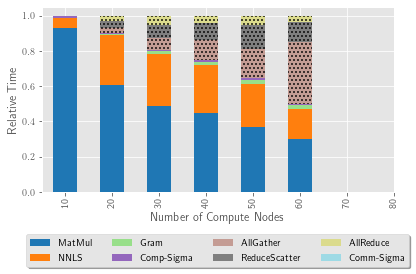

In [177]:
#title = 'Synthetic Hierarchical Strong Scaling Breakdown'
f = plt.figure()
#plt.title(title, color='black')
df4.plot(kind='bar', stacked=True, ax = f.gca(), colormap = plt.cm.tab20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=4)
plt.xlabel('Number of Compute Nodes')
plt.ylabel('Relative Time')
ind = np.arange(8)
plt.xticks(ind, ['10', '20', '30', '40','50','60','70','80'])
plt.tight_layout()
bars = f.gca().patches
hatches = ''.join(h*len(df4) for h in '    ....')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(3*hatch)
plt.savefig('synthetic_hier_strongscaling.pdf')

In [200]:
df3

,level,gram-max,nnls-max,mm-max,reducescatter-max,allgather-max,allreduce-max,comm-max,comp-max,MATVEC(SIGMA),VECMAT(SIGMA),NORM(SIGMA),COMM(SIGMA),Comp-Sigma,total_time
p,,,,,,,,,,,,,,,
1.0,15,0.000852,0.055559,0.930772,0.002063,0.001160,0.000973,5.809850,1377.463100,5.685457,6.281258,0.041546,0.000016,0.008605,1395.430119
10.0,15,0.003562,0.282920,0.607642,0.040249,0.027968,0.030368,21.191796,192.613680,0.741904,0.712289,0.055041,0.000291,0.007000,215.608742
20.0,15,0.017560,0.294764,0.485117,0.075769,0.067844,0.050417,26.423357,109.162879,0.652361,0.367649,0.062929,0.000638,0.007890,137.246944
30.0,15,0.016568,0.273903,0.447999,0.098958,0.111056,0.039723,26.440600,78.446606,0.826791,0.273731,0.064557,0.000853,0.010939,106.502082
40.0,15,0.020681,0.246916,0.366712,0.136888,0.165918,0.050186,32.859221,59.114197,0.746156,0.238420,0.074762,0.001381,0.011318,93.600557


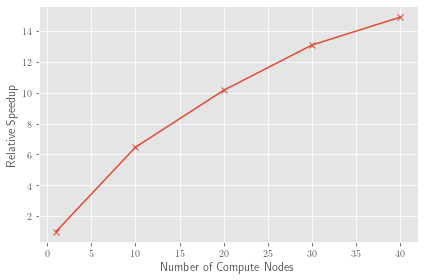

In [201]:
#title = 'Synthetic Hierarchical Strong Scaling Speedup'
f = plt.figure()
#plt.title(title, color='black')
speedup = (df3['total_time'].max())/df3['total_time']
speedup.plot(kind='line', ax = f.gca(), marker='x')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=6)
#ind = np.arange(5) 
#plt.xticks(ind, ['1', '10', '20', '30', '40'])
plt.xlabel('Number of Compute Nodes')
plt.ylabel('Relative Speedup')
plt.tight_layout()
plt.savefig('synthetic_hierarchical_speedup.pdf')

# Level Breakdown Plots

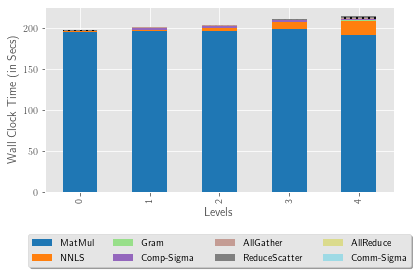

In [130]:
df5 = df2[df2['p']==10.0]
df5 = df5[['mm-max','nnls-max','gram-max','Comp-Sigma','allgather-max','reducescatter-max','allreduce-max','COMM(SIGMA)']]
df5 = df5.rename(columns={
        'gram-max':'Gram',
        'nnls-max':'NNLS',
    'mm-max':'MatMul',
    'reducescatter-max':'ReduceScatter',
    'allgather-max':'AllGather',
    'allreduce-max':'AllReduce',
    'COMM(SIGMA)' : 'Comm-Sigma'
    }, errors="raise")
#title = 'Synthetic Sequential Level Breakdown'
f = plt.figure()
#plt.title(title, color='black')
df5.plot(kind='bar', stacked=True, ax = f.gca(), colormap = plt.cm.tab20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=4)
plt.xlabel('Levels')
plt.ylabel('Wall Clock Time (in Secs)')
ind = np.arange(6)
#plt.xticks(ind, '1', '10', '20', '30', '40', '50')
plt.tight_layout()
bars = f.gca().patches
hatches = ''.join(h*len(df5) for h in '    ....')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(2*hatch)
plt.savefig('realworld_sequential_level_breakdown.pdf')

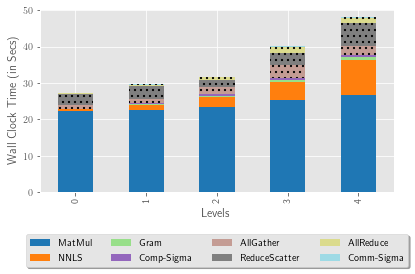

In [132]:
df6 = df2[df2['p']==80.0]
df6 = df6[['mm-max','nnls-max','gram-max','Comp-Sigma','allgather-max','reducescatter-max','allreduce-max','COMM(SIGMA)']]
df6 = df6.rename(columns={
        'gram-max':'Gram',
        'nnls-max':'NNLS',
    'mm-max':'MatMul',
    'reducescatter-max':'ReduceScatter',
    'allgather-max':'AllGather',
    'allreduce-max':'AllReduce',
    'COMM(SIGMA)' : 'Comm-Sigma'
    }, errors="raise")
#title = 'Parallel Level Breakdown on 80 Nodes'
f = plt.figure()
#plt.title(title, color='black')
df6.plot(kind='bar', stacked=True, ax = f.gca(), colormap = plt.cm.tab20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=4)
plt.xlabel('Levels')
plt.ylabel('Wall Clock Time (in Secs)')
ind = np.arange(5)
plt.xticks(ind, ind)
bars = f.gca().patches
hatches = ''.join(h*len(df6) for h in '    ....')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(2*hatch)
plt.tight_layout()
plt.savefig('realworld_parallel_level_breakdown.pdf')

# weak scaling plots

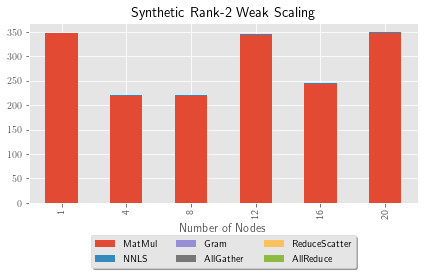

In [321]:
input_file = '../data/WEAK/syn_rank2_weakscaling.dat'
num_iters=100
df1=pd.read_csv(input_file, delimiter=" ", comment='#')
df2 =df1[['level','p','gram-max','nnls-max','mm-max','reducescatter-max','allgather-max','allreduce-max','comm-max','comp-max']]
# df2["total_time"] = df2[['gram-max','nnls-max','mm-max','reducescatter-max','allgather-max','allreduce-max']].sum(axis=1)

# for col in ['gram-max','nnls-max','mm-max','reducescatter-max','allgather-max','allreduce-max','comm-max','comp-max']:
#     df2[col] = df2[col] / df2["total_time"];
df3 = df2[['mm-max','nnls-max','gram-max','allgather-max','reducescatter-max','allreduce-max']]
df3 = df3.rename(columns={
        'gram-max':'Gram',
        'nnls-max':'NNLS',
    'mm-max':'MatMul',
    'reducescatter-max':'ReduceScatter',
    'allgather-max':'AllGather',
    'allreduce-max':'AllReduce'
    }, errors="raise")
title = 'Synthetic Rank-2 Weak Scaling'
f = plt.figure()
plt.title(title, color='black')
df3.plot(kind='bar', stacked=True, ax = f.gca())
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
ind = np.arange(6) 
plt.xticks(ind, ['1', '4', '8', '12', '16', '20'])
plt.xlabel('Number of Nodes')
bars = f.gca().patches
hatches = ''.join(h*len(df3) for h in '   +++')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.tight_layout()
plt.savefig('synthetic_rank2_weakscaling.pdf')